In [163]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, "../models/")
from baseline import *
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TODO 
- format features for use X 
- remove stopwords X
- example article for each model --> images 
- eval function 
- feature iteration singular, then on all. feature stats
- * comments 
SLIDES
- explanation of features, examples of returned output
- baseline models 

article_event.csv
# articles with 1+ features: 2223


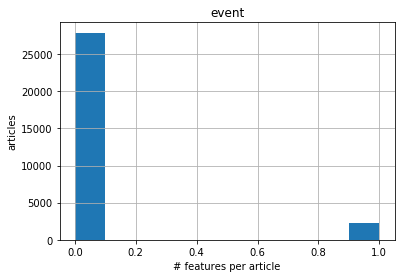

article_org.csv
# articles with 1+ features: 15584


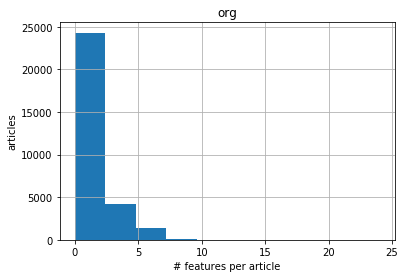

article_org_industry.csv
# articles with 1+ features: 2162


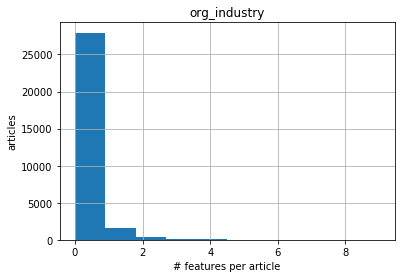

article_person.csv
# articles with 1+ features: 19157


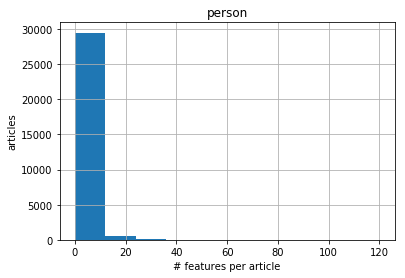

article_person_team.csv
# articles with 1+ features: 661


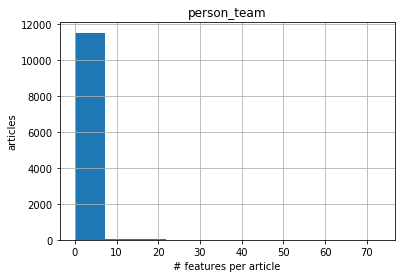

article_person_type.csv
# articles with 1+ features: 19085


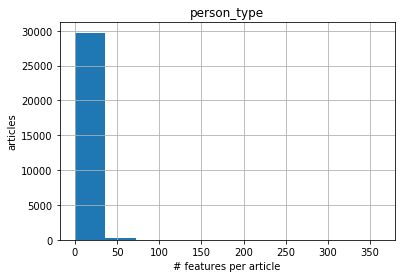

article_place.csv
# articles with 1+ features: 27720


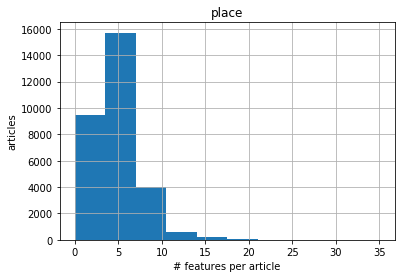

article_subject.csv
# articles with 1+ features: 30098


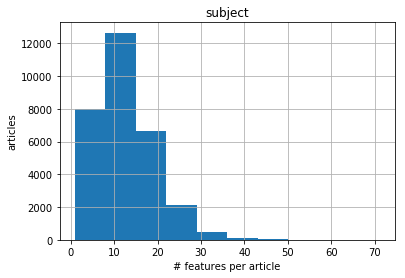

article_summary.csv
# articles with 1+ features: 27594


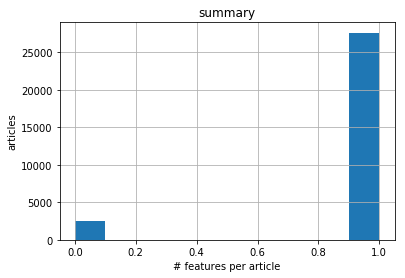

image_event.csv
# images with 1+ features: 395


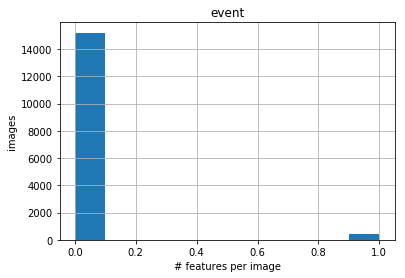

image_org.csv
# images with 1+ features: 5068


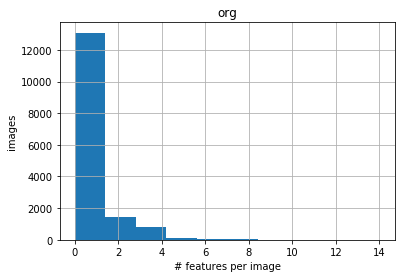

image_org_industry.csv
# images with 1+ features: 439


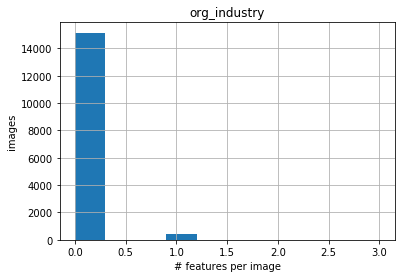

image_person.csv
# images with 1+ features: 3852


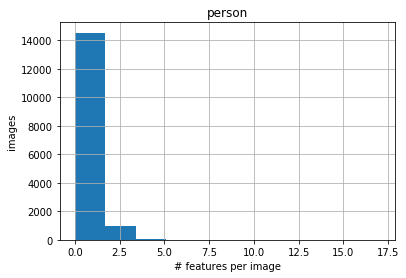

image_person_team.csv
# images with 1+ features: 242


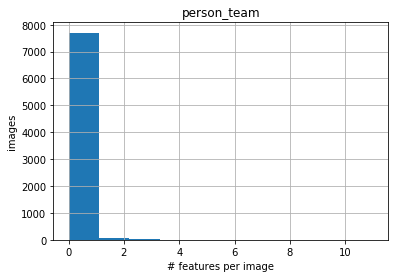

image_person_type.csv
# images with 1+ features: 6567


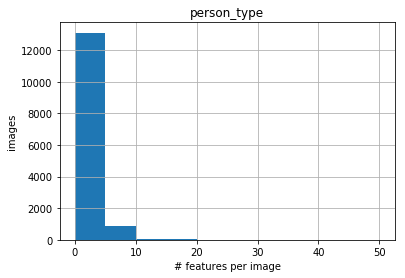

image_place.csv
# images with 1+ features: 15004


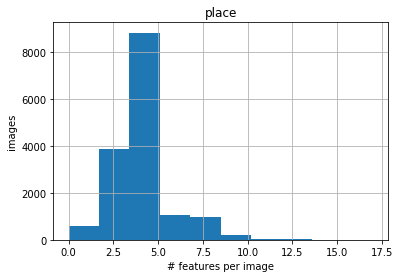

image_subject.csv
# images with 1+ features: 11086


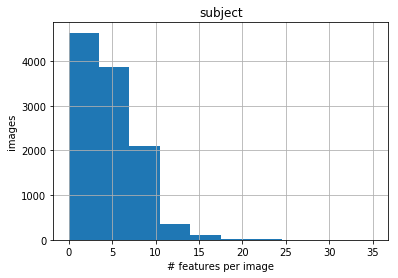

image_summary.csv
# images with 1+ features: 15590


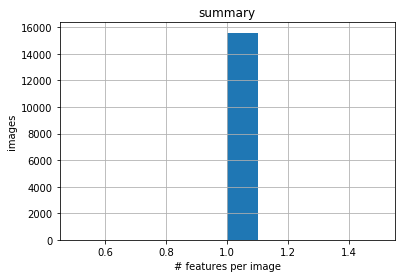

In [105]:
# read data
data_dir = "../data/csv_outputs/"
article_feats = {}
image_feats = {}
tag_ref = {'event':'event_tag',
           'org':'org_tag',
           'org_industry':'org_industry_tag',
           'person':'person_tag',
           'person_team':'person_team_tag',
           'person_type':'person_type',
           'place':'place_tag',
           'subject':'subject_tag',
           'summary':'headline_extended'
          }
for csv in os.listdir(data_dir):
    if 'ap_category' not in csv: # skip ap category
        df = pd.read_csv(data_dir+csv)
        if 'article' in csv:
            feat = csv[8:-4]
            g = df.groupby("id")[tag_ref[feat]]
            article_feats[feat] = g.apply(lambda x: list(x.astype(str).str.lower()))
        elif 'image' in csv:
            feat = csv[6:-4]
            g = df.groupby("id")[tag_ref[feat]]
            image_feats[feat] = g.apply(lambda x: list(x.astype(str).str.lower()))
        print(csv)
        plt.figure()
        plt.title(feat)
        data_type = csv.split('_')[0]
        plt.xlabel("# features per "+data_type)
        plt.ylabel(data_type+"s")
        g = g.count()
        print("# "+data_type+"s with 1+ features: "+str(len(g[g>0])))
        g.hist()
        plt.show()

total articles:  9721
# articles with 1+ images: 9721


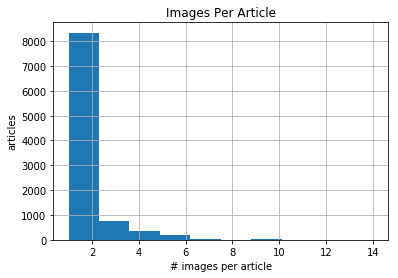

In [147]:
# formatting eval data
df = pd.read_csv('../data/csv_outputs/image_summary.csv')
g = df.groupby("article_idx")['id']
article_images = g.apply(list).to_dict()
plt.title("Images Per Article")
plt.xlabel("# images per article")
plt.ylabel("articles")
g = g.count()
print("total articles: ", len(g))
print("# articles with 1+ images: "+str(len(g[g>0])))
g.hist()
plt.show()

In [134]:
def clean_string(tags):
    ret = []
    for s in tags:
        stop_words = set(stopwords.words('english')) 
        ret += [x for x in s.translate(str.maketrans('', '', string.punctuation)).split() if x not in stop_words]
    return list(set(ret))

In [141]:
# image corpus
images = []
for imgid, tags in image_feats['summary'].iteritems():
    images.append({'imgid':imgid, 'tags': clean_string(tags)})

In [ ]:
# viewable image corpus
images = []
for imgid, tags in image_feats['summary'].iteritems():
    images.append({'imgid':imgid, 'tags': clean_string(tags)})

In [156]:
# accessible text corpus
articles = []
for articleid, tags in article_feats['summary'].iteritems():
    if articleid in article_images.keys():
        articles.append({'id':articleid,'tags': clean_string(tags)})

In [ ]:
# tfidf 
vectorizer = TfidfVectorizer()
vecs = vectorizer.fit_transform([' '.join(i['tags']) for i in images])
feats = vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(vecs.todense().tolist(), columns=feats)
tfidf_df['label'] = [i['imgid'] for i in images]
tfidf_df.set_index('label',inplace=True)

In [174]:
def show_images(ys):
    for img in ys:
        plt.figure()
        try:
            img=mpimg.imread('../data/thumbnail/'+img[0]+'.jpg')
            imgplot = plt.imshow(img)
        except:
            pass
    plt.show()

In [175]:
# example model outputs
i=0
while i == 0:
    text_tags = articles[i]['tags']
    exact_match = baseline_model(text_tags, images, 3, baseline_score)
    syn_match = baseline_model(text_tags, images, 3, lambda x,y: syn_score(x,y,eta=0.5))
    tfidf_match = baseline_model(text_tags, images, 3, lambda x,y: tfidf_score(tfidf_df,x,y))
    actual = article_images[articles[i]['id']]
    print('Simple Overlap Score:', exact_match)
    show_images(exact_match)
    print('Synonym + Overlap Score:',syn_match)
    show_images(syn_match)
    print('TF-IDF Score:',tfidf_match)
    show_images(tfidf_match)
    print('Actual Images:', actual)
    show_images(actual)
    i += 1

Simple Overlap Score: [('0df7da0c208b491ca555a34f05b5482f', 18), ('4bdaf6f1e9fe4cbc9e89828164776bf2', 18), ('a6d9c61fac7a4e3881765f91c615ad7f', 9)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Synonym + Overlap Score: [('4bdaf6f1e9fe4cbc9e89828164776bf2', 61.5), ('0df7da0c208b491ca555a34f05b5482f', 61.5), ('7177148c6ca9496ba6700ae20edad33b', 34.5)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

TF-IDF Score: [('4bdaf6f1e9fe4cbc9e89828164776bf2', 2.6080966485193517), ('0df7da0c208b491ca555a34f05b5482f', 2.6080966485193517), ('a6d9c61fac7a4e3881765f91c615ad7f', 1.0856249259052684)]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Actual Images: ['0df7da0c208b491ca555a34f05b5482f', '4bdaf6f1e9fe4cbc9e89828164776bf2']


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [161]:
# basic numeric eval function

def eval_ranking(pred, y):
    score = 0
    for img in y:
        if img in pred:
            score += 1
    return score/len(y)

In [176]:
# run eval on article summaries

exact_match = []
syn_match = []
tfidf_match = []

test_suite = articles[:100]

for i in range(len(test_suite)):
    y = article_images[articles[i]['id']]
    exact = baseline_model(text_tags, images, 10, baseline_score)
    syn = baseline_model(text_tags, images, 10, lambda x,y: syn_score(x,y,eta=0.5))
    tfidf = baseline_model(text_tags, images, 10, lambda x,y: tfidf_score(tfidf_df,x,y))
    exact_match.append(eval_ranking(exact,y))
    syn_match.append(eval_ranking(syn,y))
    tfidf_match.append(eval_ranking(tfidf,y))

In [162]:
# feature iteration

article_feats.keys()

dict_keys(['event', 'org', 'org_industry', 'person', 'person_team', 'person_type', 'place', 'subject', 'summary'])